<a href="https://colab.research.google.com/github/Orikson/MAT-421/blob/main/MAT421_Module_G_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simpson's Rule

Simpson's rule leverages the fact that a unique quadratic can be determined by 3 points. We can construct this polynomial using Lagrange polynomials, for example, which gives, over a trio of points $(x_{i-1}, x_i, x_{i+1})$,

$$P_i(x) = f(x_{i-1})\frac{(x - x_i)(x - x_{i+1})}{2h^2} - f(x_i) \frac{(x - x_i) (x - x_{i+1})}{h^2} + f(x_{i+1}) \frac{(x-x_{i-1})(x-x_i)}{2h^2}$$

where $h$ is the grid size.

This gives an integral

$$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_{i}) + f(x_{i+1}))$$

which, evaluated pairwise across each subinterval, gives the approximation of the full integral as

$$\int_a^b f(x) dx \approx \frac{h}{3} \left( f(x_0) + 4\left( \sum_{i=1,\text{odd}}^{n-1}f(x_i) \right) + 2\left( \sum_{i=2,\text{even}}^{n-2}f(x_i) \right) + f(x_n) \right)$$

As shown in the lecture notes, the Simpson's rule can be proven using Taylor expansion to have $O(4)$ convergence over the entire interval $a$ to $b$.

## Problems
In this notebook, we investigate the itnegrals of the following two functions

1. $f(x) = \sin(x) + 2x^2$
2. $f(x) = 3x - e^x$

We evaluate and plot numerical approximations of integrals $\int_0^k f(x) dx$ for $k \in [-4,4]$. To match with analytically computed indefinite integrals, we add the same initial condition given by $\int f(x) dx$.

It is apparent that as $n$ -- the number of points in the grid -- increases, the accuracy improves as well.

Analytical indefinite integral of function 1:


   3         
2⋅x          
──── - cos(x)
 3           


Analytical indefinite integral of function 2:


   2     
3⋅x     x
──── - ℯ 
 2       

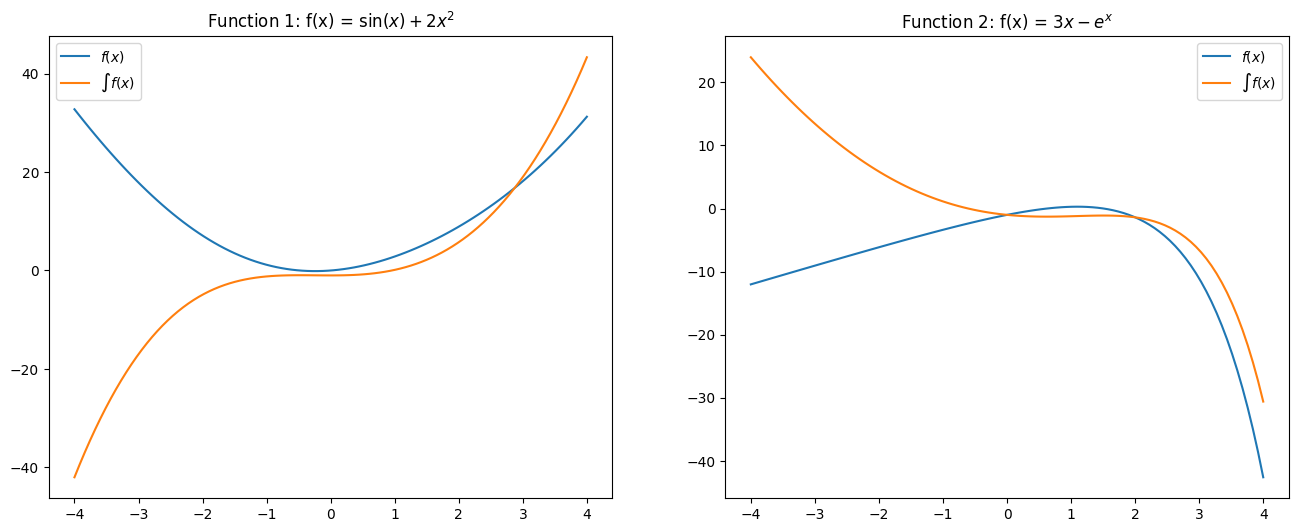

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()

# Analytical results from sympy
x = sympy.Symbol('x')

print('Analytical indefinite integral of function 1:')
display(sympy.integrate(sympy.sin(x) + 2*x**2, x))

print('\nAnalytical indefinite integral of function 2:')
display(sympy.integrate(3*x - sympy.exp(x), x))

x = np.linspace(-4, 4, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(x, np.sin(x) + 2*np.power(x,2), label='$f(x)$')
ax1.plot(x, 2*np.power(x,3)/3 - np.cos(x), label='$\int f(x)$')
ax1.legend()
ax1.set_title('Function 1: f(x) = $\sin(x) + 2x^2$')
ax2.plot(x, 3*x - np.exp(x), label='$f(x)$')
ax2.plot(x, 3*np.power(x,2)/2 - np.exp(x), label='$\int f(x)$')
ax2.legend()
ax2.set_title('Function 2: f(x) = $3x - e^x$')
plt.show()

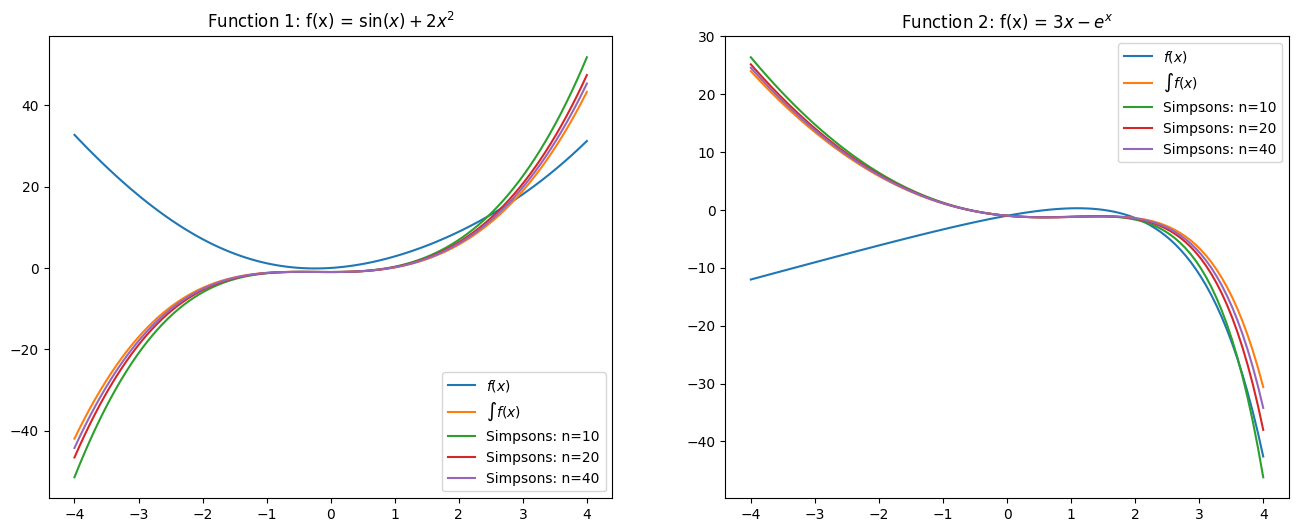

In [23]:
def simpsons(f, a, b, n=50):
  h = (b - a) / n
  x = np.linspace(a, b, n)
  fx = f(x)
  s1 = sum([fx[i] for i in range(1,n,2)])
  s2 = sum([fx[i] for i in range(2,n-1,2)])
  return (h/3) * (fx[0] + 4*s1 + 2*s2 + fx[-1])

def f1(x):
  return np.sin(x) + 2*np.power(x,2)

def f2(x):
  return 3*x - np.exp(x)

x = np.linspace(-4, 4, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(x, np.sin(x) + 2*np.power(x,2), label='$f(x)$')
ax1.plot(x, 2*np.power(x,3)/3 - np.cos(x), label='$\int f(x)$')

n = 10
for i in range(3):
  ax1.plot(x, [simpsons(f1, 0, k, n)-1 for k in x], label=f'Simpsons: n={n}')
  n *= 2

ax1.legend()
ax1.set_title('Function 1: f(x) = $\sin(x) + 2x^2$')

ax2.plot(x, 3*x - np.exp(x), label='$f(x)$')
ax2.plot(x, 3*np.power(x,2)/2 - np.exp(x), label='$\int f(x)$')

n = 10
for i in range(3):
  ax2.plot(x, [simpsons(f2, 0, k, n)-1 for k in x], label=f'Simpsons: n={n}')
  n *= 2

ax2.legend()
ax2.set_title('Function 2: f(x) = $3x - e^x$')
plt.show()